# Fourier Series

Nyquist Frequency

FFT is 

In [1]:
import cvxpy
import matplotlib.pyplot as plt
import librosa
import numpy as np

Begin by loading the wave form and plotting 

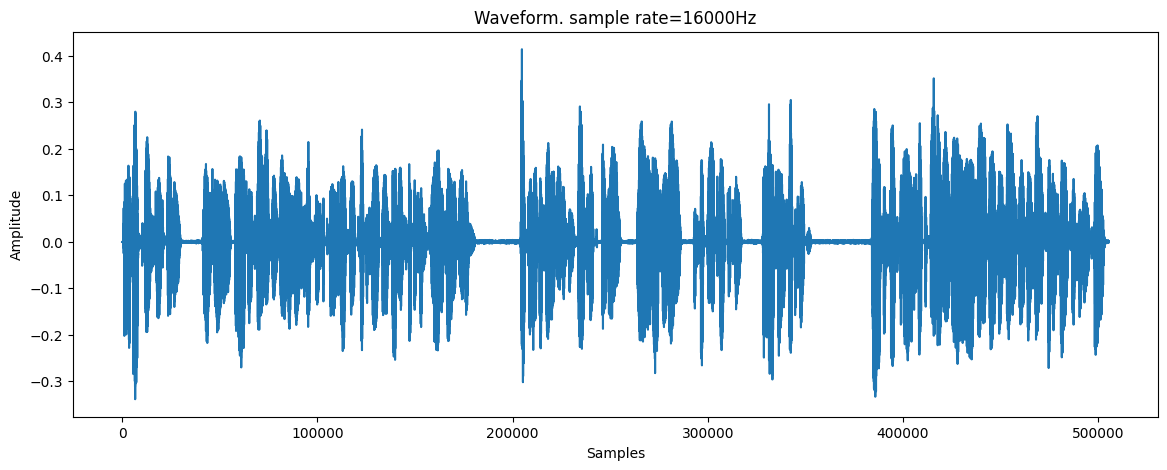

In [2]:
audio_path = "speech.wav"
waveform, sample_rate = librosa.load(audio_path, sr=None)  # sr=None preserves sample rate

plt.figure(figsize=(14, 5))
plt.plot(waveform)
plt.title(f"Waveform. sample rate={sample_rate}Hz")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

Now lets look at what's going on zoomed in

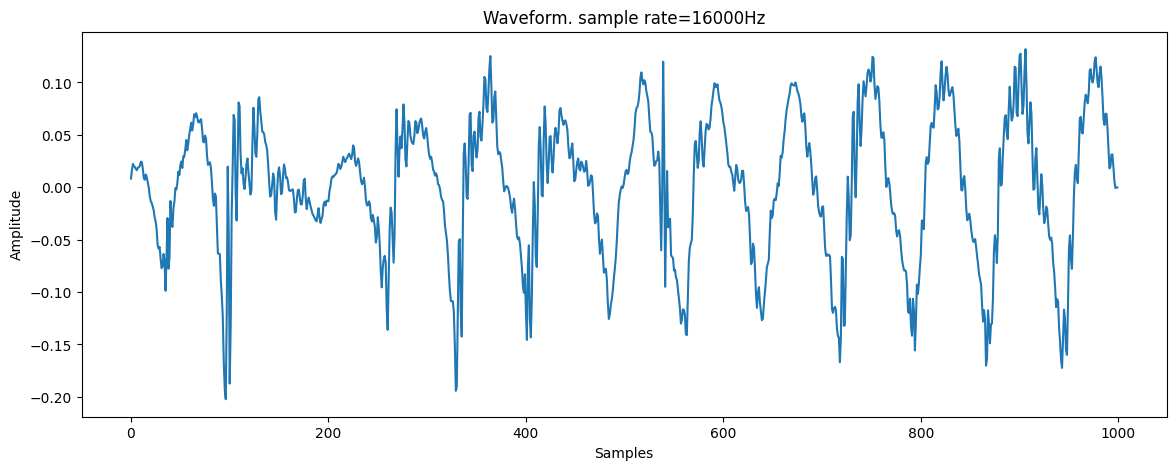

In [3]:
def s(t):
    return waveform[1000:2000][t]

t = np.arange(1000)
plt.figure(figsize=(14, 5))
plt.plot(s(t))
plt.title(f"Waveform. sample rate={sample_rate}Hz")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

Okay now a brief review of sinusoids

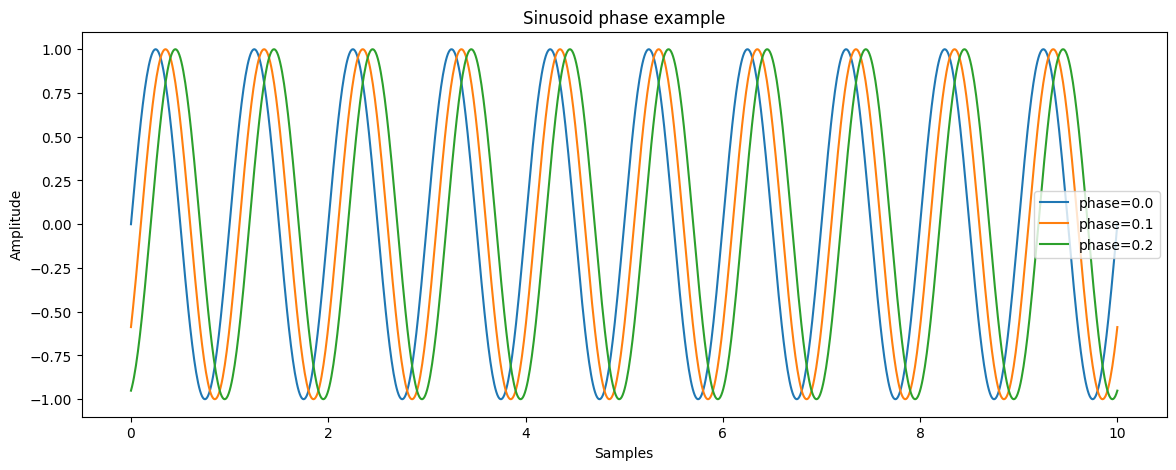

In [4]:
import numpy as np
def sinusoid(t,freq,phase):
    return np.sin(2 * np.pi * (freq * t - phase))

t = np.linspace(0,10,1000)

plt.figure(figsize=(14, 5))
for i in range(3):
    y = sinusoid(t, 1, i*0.1)
    plt.plot(t, y, label=f'phase={i*0.1}')
    
plt.title(f"Sinusoid phase example")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

The phase is a horizontal shift of the sin wave. 

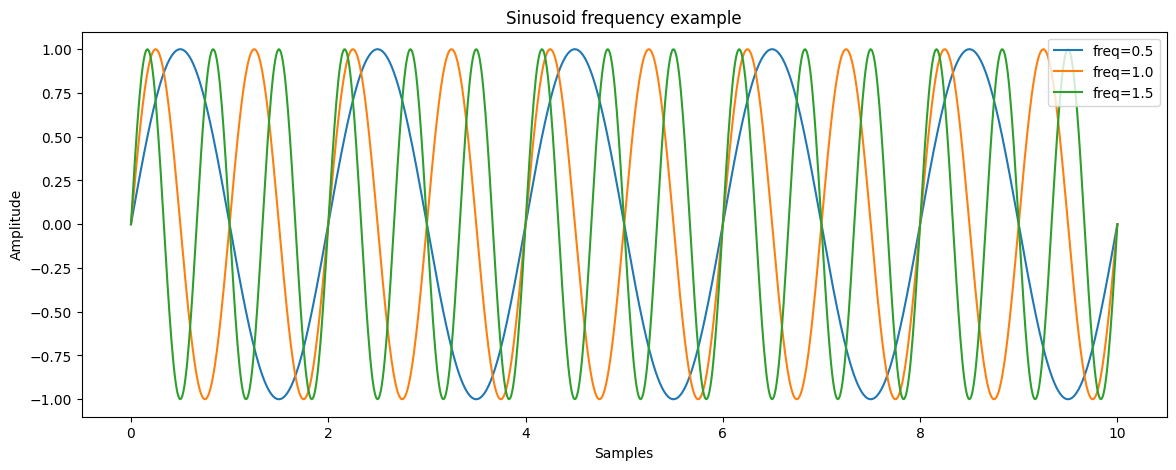

In [5]:
import numpy as np
def sinusoid(t,freq,phase):
    return np.sin(2 * np.pi * (freq * t - phase))

t = np.linspace(0,10,1000)

plt.figure(figsize=(14, 5))
for i in range(1,4):
    y = sinusoid(t, 0.5*i, 1)
    plt.plot(t, y, label=f'freq={i*0.5}')
    
plt.title(f"Sinusoid frequency example")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

The fourier transform converts from the time domain to the frequency domain. It does this by representing the signal as infinitely many sinusoids of varying frequency. The main steps are:

1. Enumerate accross frequency
2. For each frequency optimise phase to maximise similarity of sinusoid with signal
3. Calculate magnitude as similarity. 

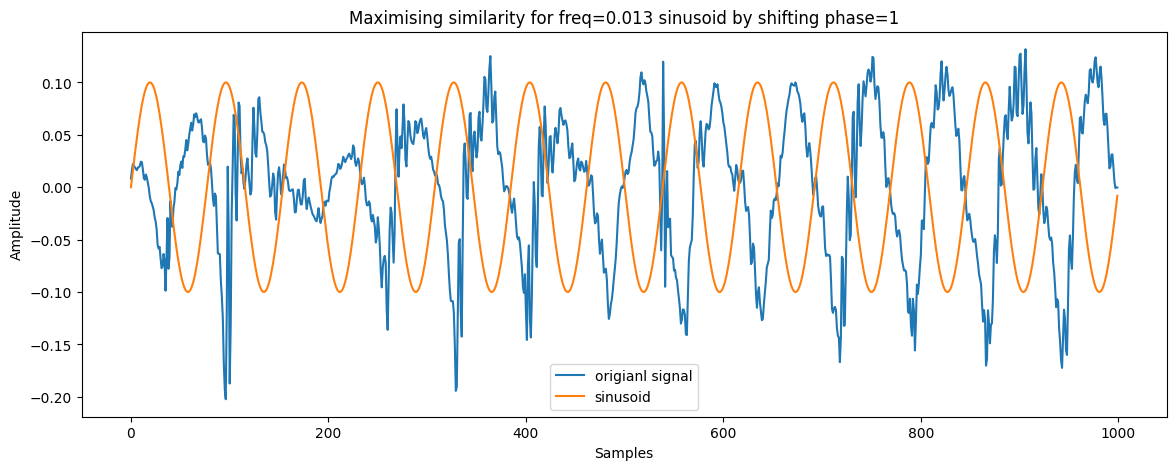

In [6]:
freq = 0.013
phase = 1

plt.figure(figsize=(14, 5))
t = np.arange(1000)
y = sinusoid(t, freq, phase) * .1
plt.plot(s(t), label='origianl signal')
plt.plot(t, y, label=f'sinusoid')
plt.title(f"Maximising similarity for freq={freq} sinusoid by shifting phase={phase}")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

They're completly out of phase here. But we can tweak the phase to try have peaks matching.

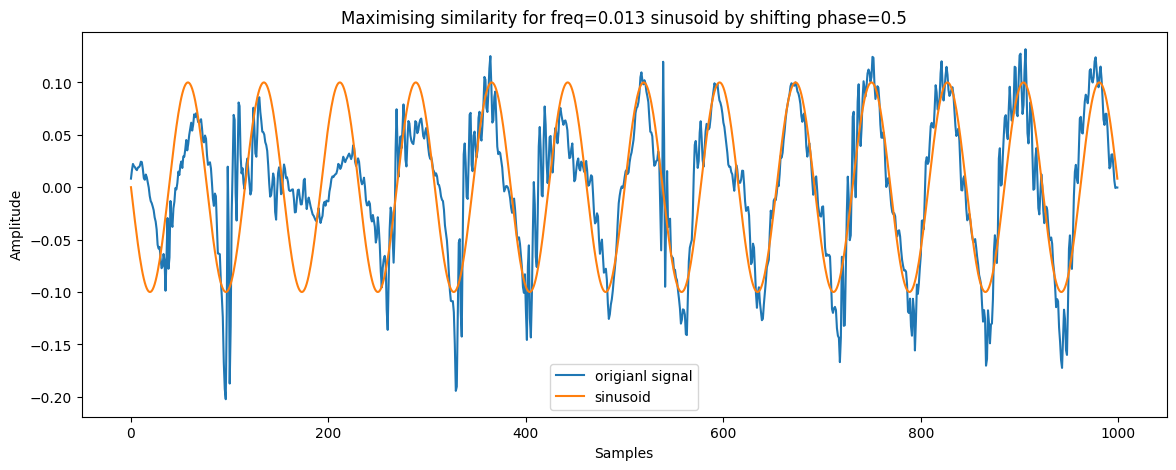

In [7]:
freq = 0.013
phase = 0.5

plt.figure(figsize=(14, 5))
t = np.arange(1000)
y = sinusoid(t, freq, phase) * .1
plt.plot(s(t), label='origianl signal')
plt.plot(t, y, label=f'sinusoid')
plt.title(f"Maximising similarity for freq={freq} sinusoid by shifting phase={phase}")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

That's a bit better. To measure the similarity between the signal and the sinusoid specified by frequency and phase we use an inner product. 

$$ \phi_f = argmax_{\phi \in [0,1]} \left[ \int s(t) \sin(2 \pi (ft - \phi)) dt\right]  $$ 

So the similarity is the area of the product of the original signal and the sinusoid. Intuitievly if they're out of phase they cancel each other and the area is minimised. 

The magnitude (similarity) is then:
$$ d_f = max_{\phi \in [0,1]} \left[ \int s(t) \sin(2 \pi (ft - \phi)) dt \right] $$ 

Looking at the out of phase product:

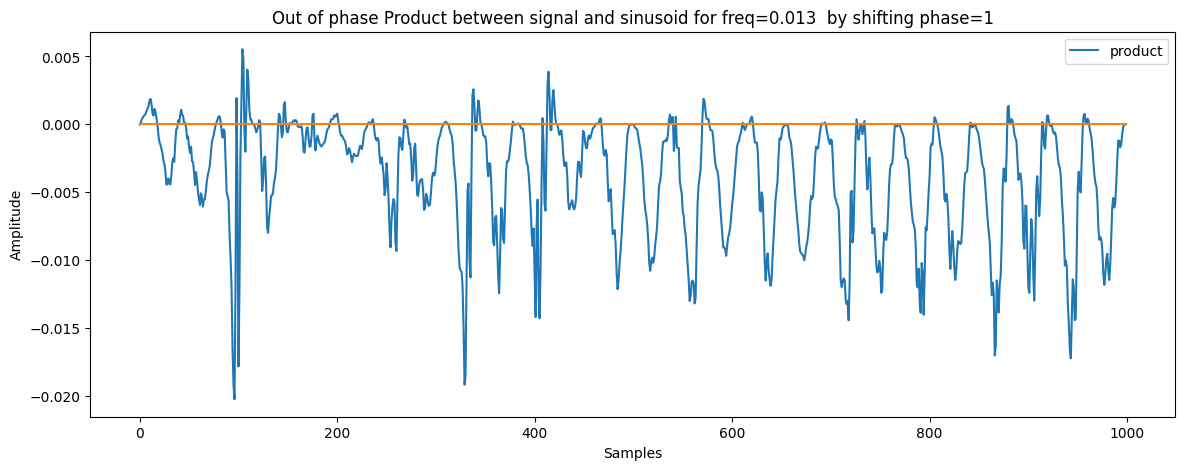

In [8]:
freq = 0.013
phase = 1

plt.figure(figsize=(14, 5))
t = np.arange(1000)
y = sinusoid(t, freq, phase) * .1
plt.plot(t, s(t) * y, label=f'product')
plt.plot(np.zeros(1000))
plt.title(f"Out of phase Product between signal and sinusoid for freq={freq}  by shifting phase={phase}")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

Notice it's mostly negative

And now looking at the inphase product:

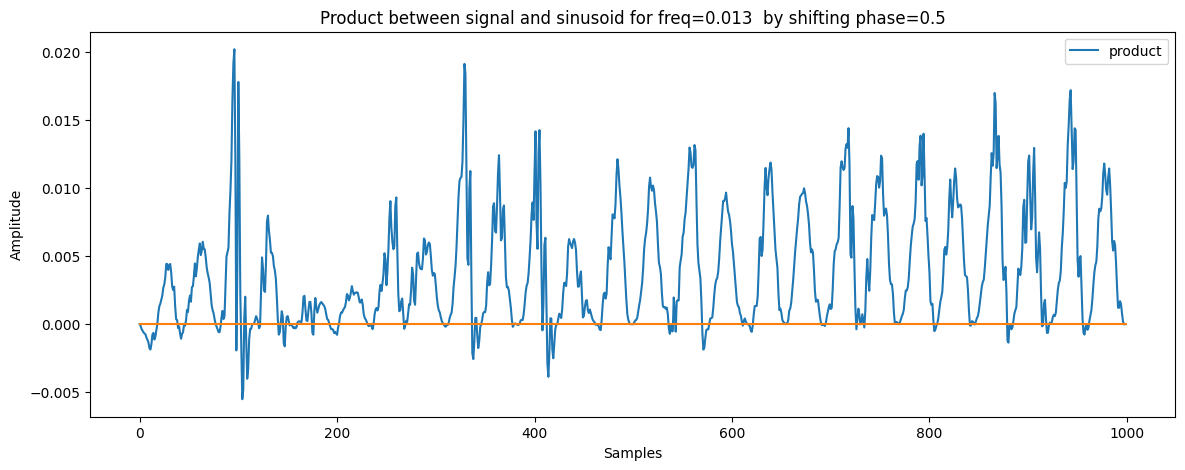

In [9]:
freq = 0.013
phase = 0.5

plt.figure(figsize=(14, 5))
t = np.arange(1000)
y = sinusoid(t, freq, phase) * .1
plt.plot(t, s(t) * y, label=f'product')
plt.plot(np.zeros(1000))
plt.title(f"Product between signal and sinusoid for freq={freq}  by shifting phase={phase}")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

Mostly positive. This in-phase product will have a much higher area, which will be calculated with the integral.

So a simple fourier transform would iterative over a bunch of frequencies, for each find phase that maximises inner product with signal, and record the magnitude (area/similarity). Will do that now:

In [10]:
num_phases = 10
num_freqs = 1000

freq_max_magnitudes = np.zeros(num_freqs)
for freq_i, freq in enumerate(np.linspace(0, 0.1, num_freqs)):
    phase_magnitudes = np.zeros(num_phases)
    for phase_i, phase in enumerate(np.linspace(0, 1, num_phases)):
        magnitude = 0
        for t in np.arange(1000):
            prod = s(t) * np.sin(np.pi * 2 * (freq * t - phase))
            magnitude += prod
        phase_magnitudes[phase_i] = magnitude
    freq_max_magnitudes[freq_i] = np.max(phase_magnitudes)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


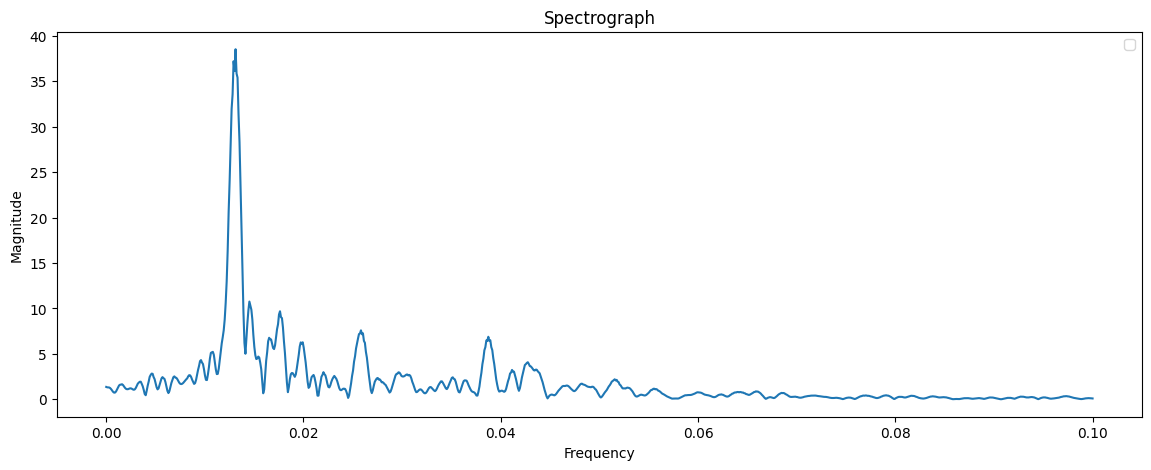

In [11]:
plt.figure(figsize=(14, 5))
f = np.linspace(0, 0.1, num_freqs)
plt.plot(f, freq_max_magnitudes)
plt.title(f"Spectrograph")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

This concludes the first section on the basics of the fourier transform. I will now move on to representing this in a cleaner way, using complex numbers.


# Fourier Transform

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import imageio
from IPython.display import Image, display

# Generate your matplotlib plots
# Replace the code below with your own plot generation logic



First a remineder on complex numbers .

$ i = \sqrt{ -1 }$

Usually expressed with real and complext part

z = 3 + 2j

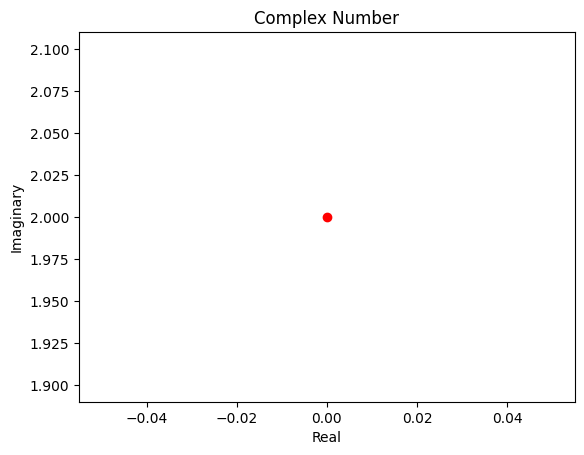

In [13]:
# Complex number
z = 0 + 2j

# Extract real and imaginary parts
x = z.real
y = z.imag

# Create a scatter plot
plt.scatter(x, y, color='red')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Complex Number')

# Show the plot
plt.show()

This is graphed on the imaginary/real plane. Next lets look at the euler formula 

Text(0.5, 1.0, 'Complex Number')

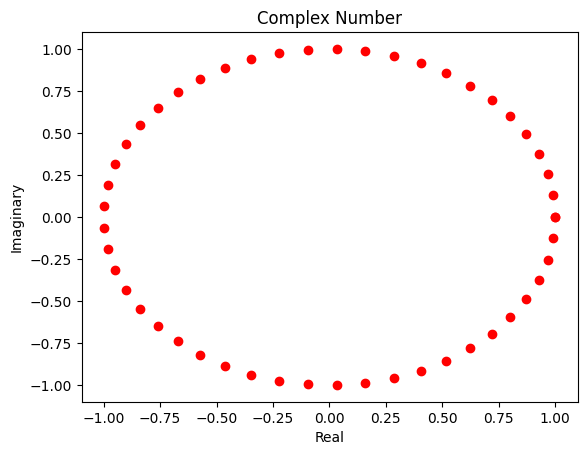

In [14]:
theta = np.linspace(0, 2*np.pi, 50)
euler_form = np.exp(z * theta)

x = euler_form.real
y = euler_form.imag

# Create a scatter plot
plt.scatter(x, y, color='red')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Complex Number')

We can see it traces the unit sphere. It might be helpful to look at a GIF of this in action

In [15]:
import os 

num_frames = 40
frames = []
if os.path.exists('frames'):
    os.system('rm -rf frames')
os.mkdir('frames')
for i in range(num_frames):
    theta_ = theta[:i]
    euler_form = np.exp(z * theta_)
    
    x = euler_form.real
    y = euler_form.imag
    
    plt.plot(x, y)
    plt.title(f"Frame {i+1}")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.gca().set_aspect('equal')
    
    # Save the current plot as an image
    plt.savefig(f"frames/frame_{i}.png")
    plt.close()  # Close the figure to avoid memory leaks
    
    # Read the saved image and append it to the frames list
    frames.append(imageio.imread(f"frames/frame_{i}.png"))

if os.path.exists('frames'):
    os.system('rm -rf frames')

# Save the frames as a GIF
imageio.mimsave("euler.gif", frames, duration=0.1)

/tmp/ipykernel_220984/3955710788.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f"frames/frame_{i}.png"))


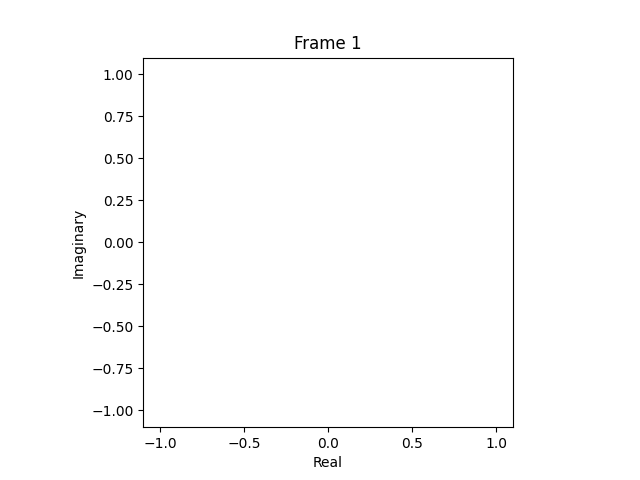

In [16]:
display(Image(filename="euler.gif"))

This shows how the euler formula traces the unit sphere on the complex plane counter clockwise. This gives an easy way of representing the polar coordinates of a complex number c:

$$ c = |c|e^{i \theta} $$

where $\exp{(i \theta)}$ gives a direction and the absolute length of c gives the distance to the complex number c.

Now lets see what multiplying a constant does

In [17]:
import os 

num_frames = 40
frames = []
if os.path.exists('frames'):
    os.system('rm -rf frames')
os.mkdir('frames')
for i in range(num_frames):
    theta_ = theta[:i]
    euler_form = np.exp(z * theta_ * 1.5)
    
    x = euler_form.real
    y = euler_form.imag
    
    plt.plot(x, y)
    plt.title(f"Frame {i+1}")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.gca().set_aspect('equal')
    
    # Save the current plot as an image
    plt.savefig(f"frames/frame_{i}.png")
    plt.close()  # Close the figure to avoid memory leaks
    
    # Read the saved image and append it to the frames list
    frames.append(imageio.imread(f"frames/frame_{i}.png"))

if os.path.exists('frames'):
    os.system('rm -rf frames')

# Save the frames as a GIF
imageio.mimsave("euler_faster.gif", frames, duration=0.1)

/tmp/ipykernel_220984/2279516608.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f"frames/frame_{i}.png"))


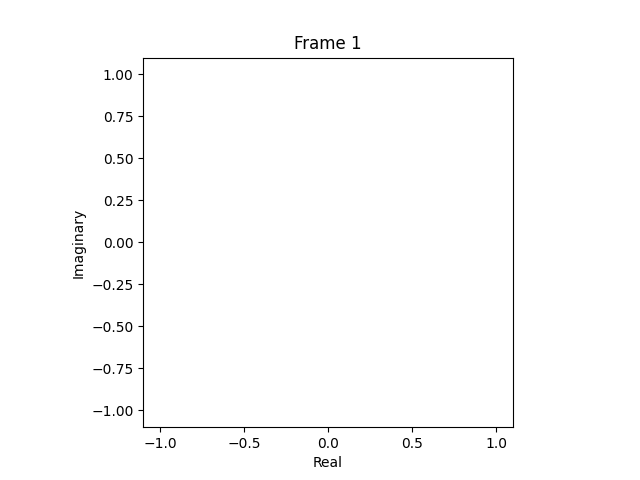

In [18]:
display(Image(filename="euler_faster.gif"))

Multipling theta by a constant traces the circle faster




The point of all this complex stuff is to use the magnitude and phase as polar coordinates. Phase gives the roation while magnitude gives the distance. 

Complex fourier transform is a function: $\hat{g}: R \rightarrow C$. 

$$ \hat{g} = \int{g(t) e^{-i2\pi ft} dt} $$

Comparing to formula for polar complex number $\theta = -2 \pi ft$. We know multiplying a constant traces this circle quicker. THe product inside the integral wineds the signal around the complex plane. With the frequency determining the 'speed' around the unit sphere. 



In [22]:
def make_animation(xs, ys, num_frames, name="complex.gif"):
    if os.path.exists('frames'):
        os.system('rm -rf frames')
    os.mkdir('frames')
    
    
    frames = []
    n = np.arange(len(xs))[::1000//num_frames]
    print(n)
    for i in range(num_frames):
        plt.plot(xs[:n[i]], ys[:n[i]])
        plt.title(f"Frame {i+1}")
        plt.xlabel("Real")
        plt.ylabel("Imaginary")
        #plt.xlim(-1.1, 1.1)
        #plt.ylim(-1.1, 1.1)
        plt.gca().set_aspect('equal')

        # Save the current plot as an image
        plt.savefig(f"frames/frame_{i}.png")
        plt.close()  # Close the figure to avoid memory leaks

        # Read the saved image and append it to the frames list
        frames.append(imageio.imread(f"frames/frame_{i}.png"))
    
    if os.path.exists('frames'):
        os.system('rm -rf frames')
    
    imageio.mimsave(name, frames, duration=0.1)


We can then write the fourier coefficient as :

$$ c_f = \dfrac{d_f}{\sqrt 2 } \exp(-i2 \pi\theta f)$$

The minus sign in the exponent switches to tracking clockwise. 

The fourier transform can then be expressed

$$g$$

# Discrete Fourier Transform

# Short time fourier transformn

In [27]:
s(t)

-0.00030517578

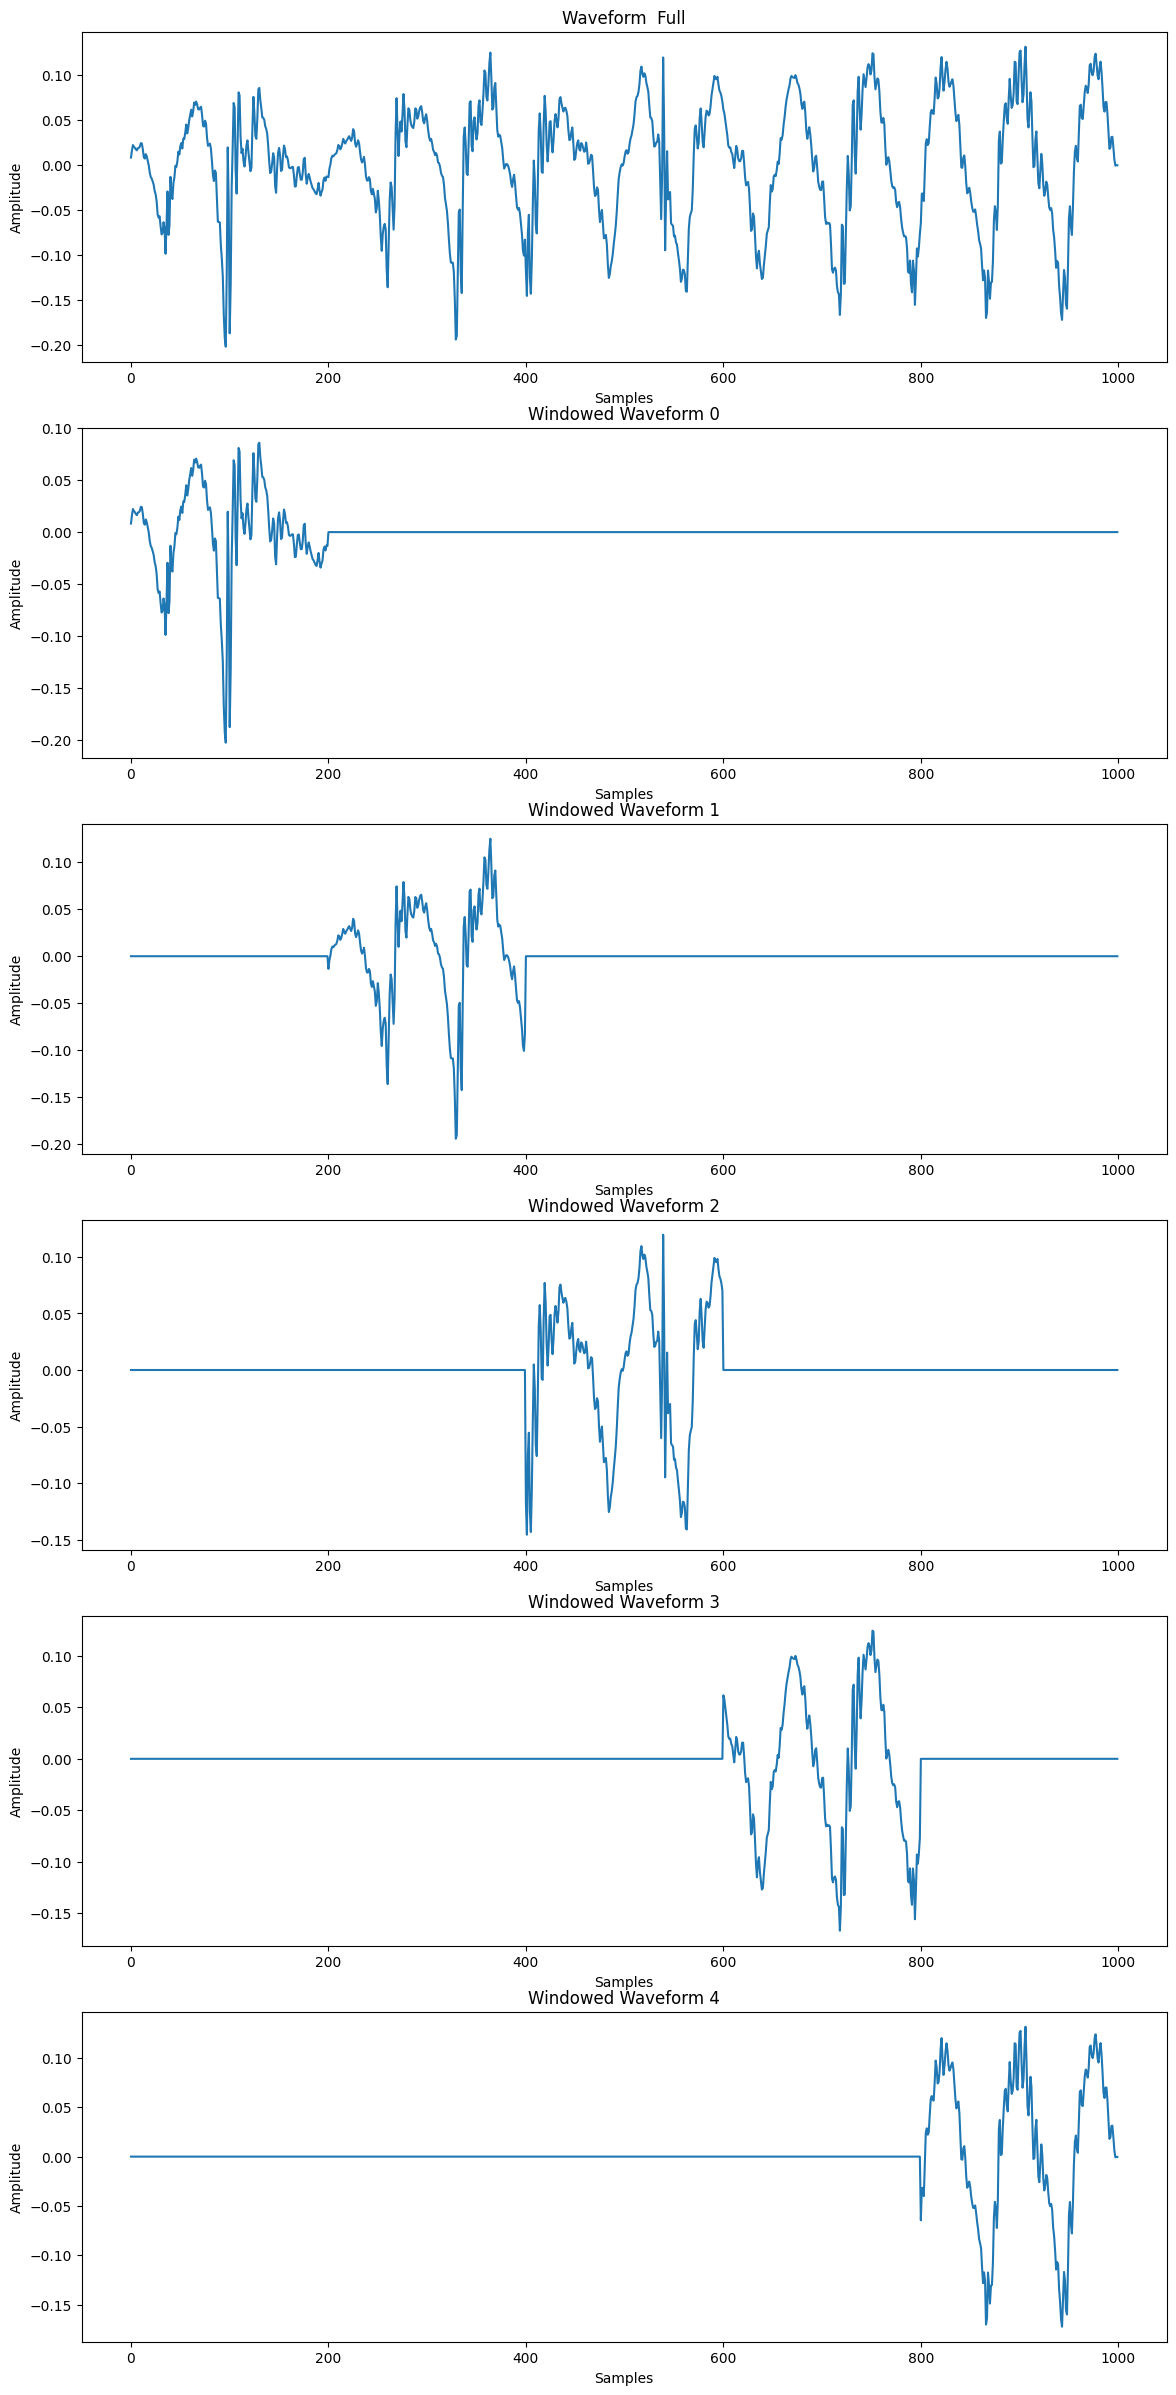

In [43]:
hop_size =200
window_size = 200
frame_size = 200
t = np.arange(1000)

fig, axs = plt.subplots(6,1, figsize=(14, 30))
#plt.figure(figsize=(14, 5))
axs[0].plot(s(t))
axs[0].set_title(f"Waveform  Full")
axs[0].set_xlabel("Samples")
axs[0].set_ylabel("Amplitude")

    
for i in range(5):
    window = np.zeros(len(s(t)))
    window[i*hop_size:i*hop_size+frame_size] = 1
    
    axs[i+1].plot(s(t) * window)
    axs[i+1].set_title(f"Windowed Waveform {i}")
    axs[i+1].set_xlabel("Samples")
    axs[i+1].set_ylabel("Amplitude")
plt.savefig('windowed_signal.png')

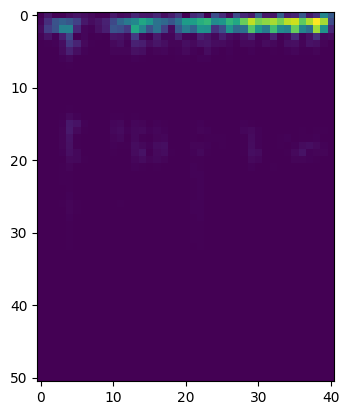

In [66]:
"""
librosa stft
n_fft = length of the windowed signal
hop_length = samples to move for each dft. win_length // 4 default
win_length = Each frame of audio is windowed by window of length win_length and then padded with zeros to match n_fft
"""
S = librosa.stft(s(t),  n_fft=100)
spectrogram = np.absolute(S) ** 2
plt.imshow(spectrogram)
plt.savefig('spec.png')

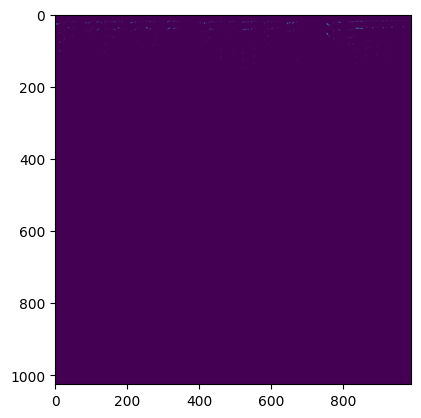

In [65]:
S = librosa.stft(waveform,  n_fft=2048)
spectrogram = np.absolute(S) ** 2
plt.imshow(spectrogram)